<a href="https://colab.research.google.com/github/be0wulf2001/McDonald-s-Case-Study/blob/main/McDonald's_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ten-Step Market Segmentation Process

The ten-step process for market segmentation offers a structured framework to identify, target, and engage distinct consumer groups effectively. It integrates strategic decision-making with data-driven analysis, allowing organizations to optimize their marketing efforts for specific market segments.

---

## 1. **Deciding Whether to Segment**
- **Objective**: Determine if segmentation is appropriate for the organization or product.
- **Key Considerations**: Analyze resource availability, market diversity, and the potential benefits and challenges of segmentation.
- **Pitfalls**: Over-segmentation leading to excessive complexity or under-segmentation missing opportunities.

---

## 2. **Specifying the Ideal Target Segment**
- **Objective**: Define criteria for evaluating and selecting segments.
- **Key Actions**:
  - Identify “knock-out” criteria (e.g., budget constraints, legal restrictions).
  - Define attractiveness criteria (e.g., profitability, growth potential).
- **Outcome**: A clear picture of the ideal segment to target.

---

## 3. **Collecting Data**
- **Objective**: Gather data relevant to potential segmentation variables.
- **Approaches**:
  - Use **surveys**, **internal sources**, or **experiments** to collect information on demographic, geographic, psychographic, or behavioral characteristics.
  - Ensure data quality by addressing sample size and variable relevance.
- **Pitfalls**: Poor data quality or misaligned data collection methods.

---

## 4. **Exploring and Cleaning Data**
- **Objective**: Prepare the data for segmentation analysis.
- **Key Actions**:
  - Perform basic descriptive statistics to understand distributions.
  - Address missing or inconsistent data.
  - Pre-process data (e.g., standardizing numeric variables, encoding categorical data).
- **Outcome**: A clean dataset ready for analysis.

---

## 5. **Extracting Segments**
- **Objective**: Identify meaningful groups within the market.
- **Methods**:
  - **Clustering Algorithms**: k-means, hierarchical clustering.
  - **Model-Based Methods**: Mixtures of distributions or regressions.
- **Considerations**: Select the most suitable method based on the data and market characteristics.
- **Outcome**: Defined market segments based on data patterns.

---

## 6. **Profiling Segments**
- **Objective**: Characterize segments by their unique features.
- **Approaches**:
  - Identify key traits that distinguish segments.
  - Use visualizations (e.g., segment profile plots) to summarize data.
- **Outcome**: An understanding of the attributes that define each segment.

---

## 7. **Describing Segments**
- **Objective**: Develop a detailed description of segment demographics, behaviors, or preferences.
- **Methods**:
  - Statistical tests to identify significant differences between segments.
  - Regression or tree-based models for in-depth analysis.
- **Outcome**: A comprehensive description of segment characteristics.

---

## 8. **Selecting Target Segments**
- **Objective**: Decide which segments to target.
- **Key Actions**:
  - Evaluate segments based on strategic goals, resource alignment, and market attractiveness.
  - Use criteria such as profitability, size, and alignment with company strengths.
- **Outcome**: Selection of the most promising segments.

---

## 9. **Customizing the Marketing Mix**
- **Objective**: Tailor the 4Ps (Product, Price, Place, Promotion) to the target segments.
- **Key Actions**:
  - Adapt products to meet segment needs.
  - Determine segment-specific pricing and distribution strategies.
  - Design targeted promotional campaigns.
- **Outcome**: A refined marketing mix that resonates with target segments.

---

## 10. **Evaluation and Monitoring**
- **Objective**: Assess the effectiveness of the segmentation strategy over time.
- **Key Actions**:
  - Measure segment stability and performance.
  - Monitor changes in market dynamics and segment evolution.
- **Outcome**: Continuous improvement and adaptation of segmentation efforts.

---

## Summary of the Process  
This structured approach ensures a logical progression from identifying the need for segmentation to implementing and evaluating it. By following these ten steps, organizations can achieve a deep understanding of their market, tailor their strategies effectively, and stay responsive to evolving consumer behaviors and market conditions.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assumes the CSV is uploaded to Colab or accessible via a URL)
from google.colab import files
uploaded = files.upload()  # Use this to upload mcdonalds.csv
data = pd.read_csv("mcdonalds.csv")

Saving mcdonalds.csv to mcdonalds (1).csv


In [ ]:
print(data.columns.tolist())
print(data.shape)
print(data.head(3))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
features = data.iloc[:, :11]  # Adjust columns if necessary

# Convert categorical data (e.g., Yes/No) to binary
binary_features = (features == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(binary_features)

col_means = np.round(binary_features.mean(axis=0), 2).tolist()
print(dict(zip(data.columns[:11], col_means)))

{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


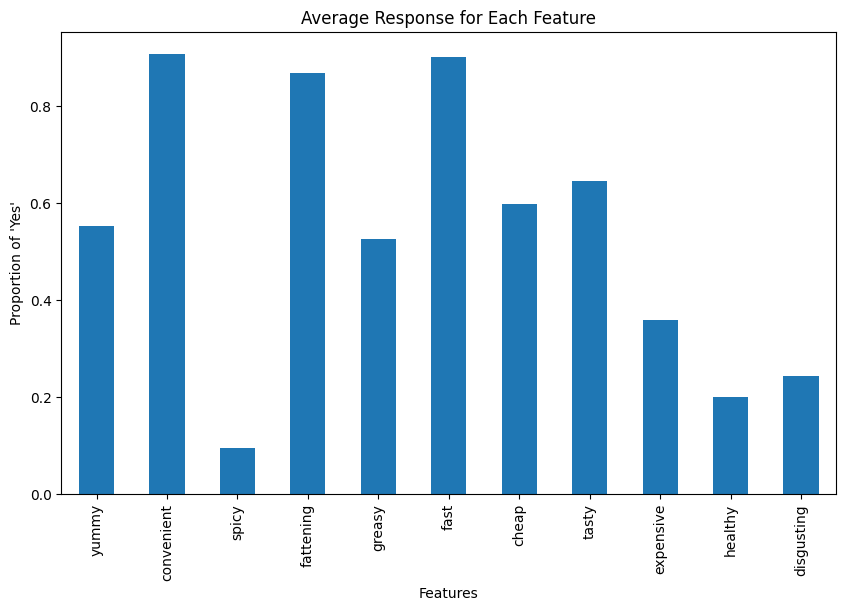

In [ ]:
# Visualize the distribution of responses
binary_features.mean().plot(kind='bar', figsize=(10, 6))
plt.title("Average Response for Each Feature")
plt.xlabel("Features")
plt.ylabel("Proportion of 'Yes'")
plt.show()

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0                 1.68                    0.26                   0.26
1                 1.28                    0.15                   0.40
2                 1.18                    0.13                   0.53
3                 1.04                    0.10                   0.63
4                 0.96                    0.08                   0.71
5                 0.88                    0.07                   0.78
6                 0.85                    0.06                   0.85
7                 0.77                    0.05                   0.90
8                 0.72                    0.05                   0.95
9                 0.55                    0.03                   0.98
10                0.51                    0.02                   1.00
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.4 -0.3  0.3  0.0 -0.3  0.1 -0.2 -0.0  0.2  -0.7  -0.1
convenient  0.3  0.0  0.

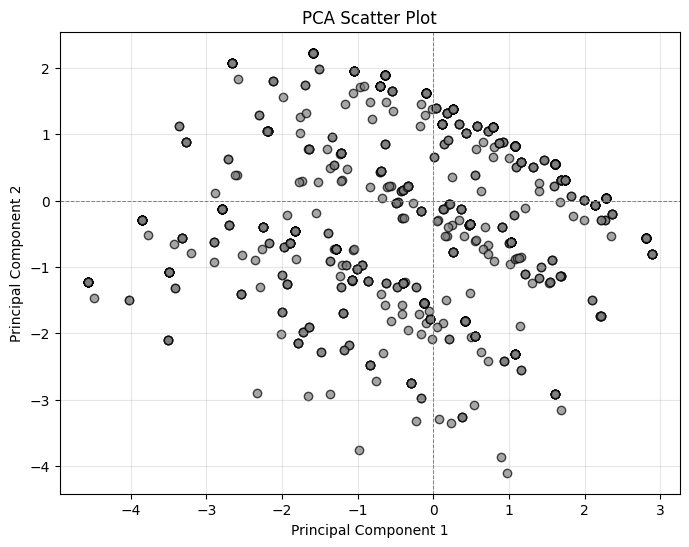

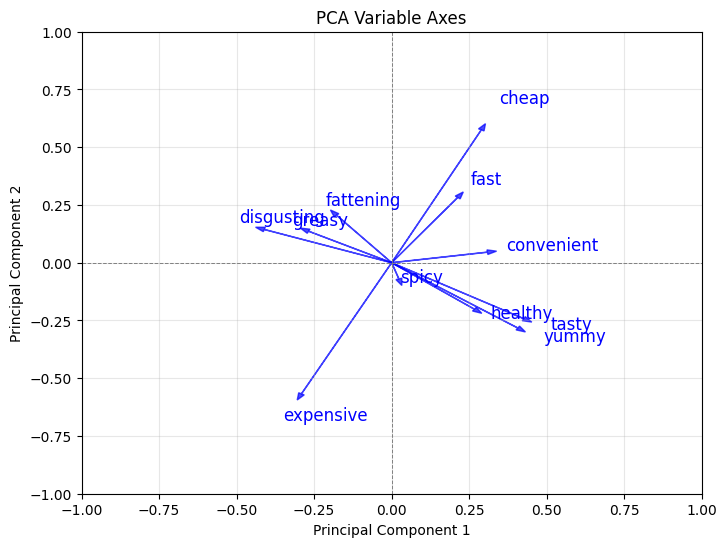

In [ ]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Summary of PCA: Explained variance and cumulative proportion
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})
print(summary_df.round(2))

# Print factor loadings
factor_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=binary_features.columns
)
print(factor_loadings.round(1))

# PCA scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', alpha=0.7, edgecolor='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
plt.grid(alpha=0.3)
plt.show()

# Project axes (arrows for the original variables)
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, color='blue', alpha=0.7, head_width=0.02, head_length=0.03)
    plt.text(x * 1.2, y * 1.2, binary_features.columns[i], color='blue', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Variable Axes')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
plt.grid(alpha=0.3)
plt.xlim(-1, 1)  # Adjust axis limits for better visibility
plt.ylim(-1, 1)
plt.show()

WCSS for each k: [2145.5037269171557, 1818.7176591653833, 1602.9860148663201, 1435.3247856934029, 1332.1504830614558, 1249.2338900799716, 1191.5809481928013]


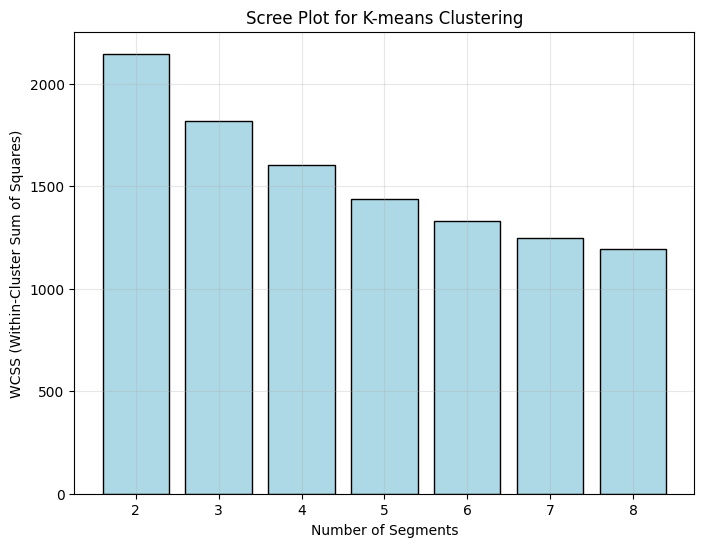

In [ ]:
# Perform K-means clustering on binary_features for clusters ranging from 2 to 8
wcss = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(binary_features)
    wcss.append(kmeans.inertia_)

# Print WCSS values for reference
print("WCSS for each k:", wcss)
# Scree plot of WCSS against the number of clusters
plt.figure(figsize=(8, 6))
plt.bar(range(2, 9), wcss, color='lightblue', edgecolor='black')
plt.xlabel('Number of Segments')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Scree Plot for K-means Clustering')
plt.xticks(range(2, 9))  # Ensure x-axis shows the cluster numbers
plt.grid(alpha=0.3)
plt.show()

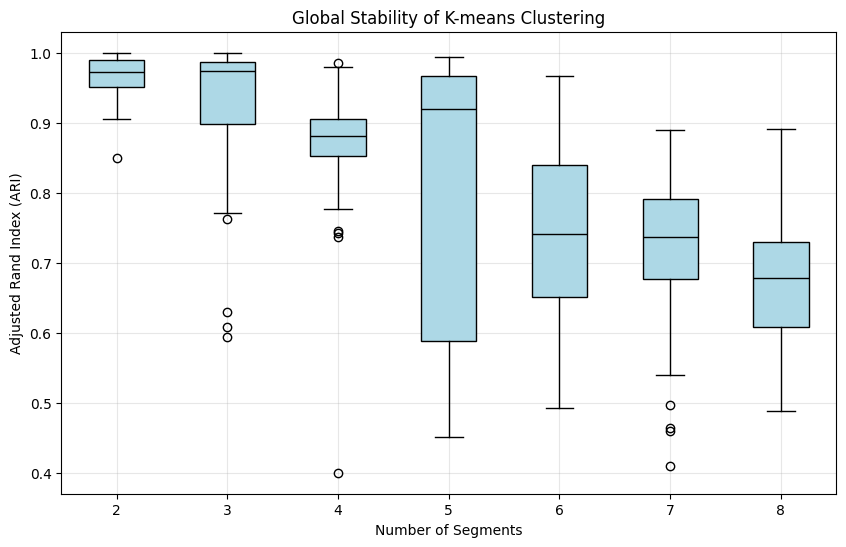

In [ ]:
from sklearn.metrics import adjusted_rand_score
from tqdm import tqdm
def bootstrap_kmeans(data, clusters_range, n_boot=100, n_init=10, random_state=1234):
    np.random.seed(random_state)
    stability_results = {k: [] for k in clusters_range}

    for k in clusters_range:
        base_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        base_kmeans.fit(data)

        base_labels = base_kmeans.labels_

        for _ in range(n_boot):
            # Generate a random bootstrap sample
            bootstrap_indices = np.random.choice(data.shape[0], data.shape[0], replace=True)
            bootstrap_sample = data.iloc[bootstrap_indices]

            # Perform K-means on the bootstrap sample
            kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
            kmeans.fit(bootstrap_sample)

            # Calculate ARI between the original labels and the bootstrap sample labels
            bootstrap_labels = kmeans.labels_
            ari = adjusted_rand_score(base_labels[bootstrap_indices], bootstrap_labels)
            stability_results[k].append(ari)

    return stability_results
# Assess stability for 2 to 8 clusters
clusters_range = range(2, 9)
stability_results = bootstrap_kmeans(binary_features, clusters_range, n_boot=100, n_init=10)

# Convert results to list for each number of clusters
stability_data = [stability_results[k] for k in clusters_range]
# Boxplot of ARI for stability analysis
plt.figure(figsize=(10, 6))
plt.boxplot(stability_data, positions=clusters_range, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='black'))

plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Global Stability of K-means Clustering')
plt.xticks(clusters_range)
plt.grid(alpha=0.3)
plt.show()


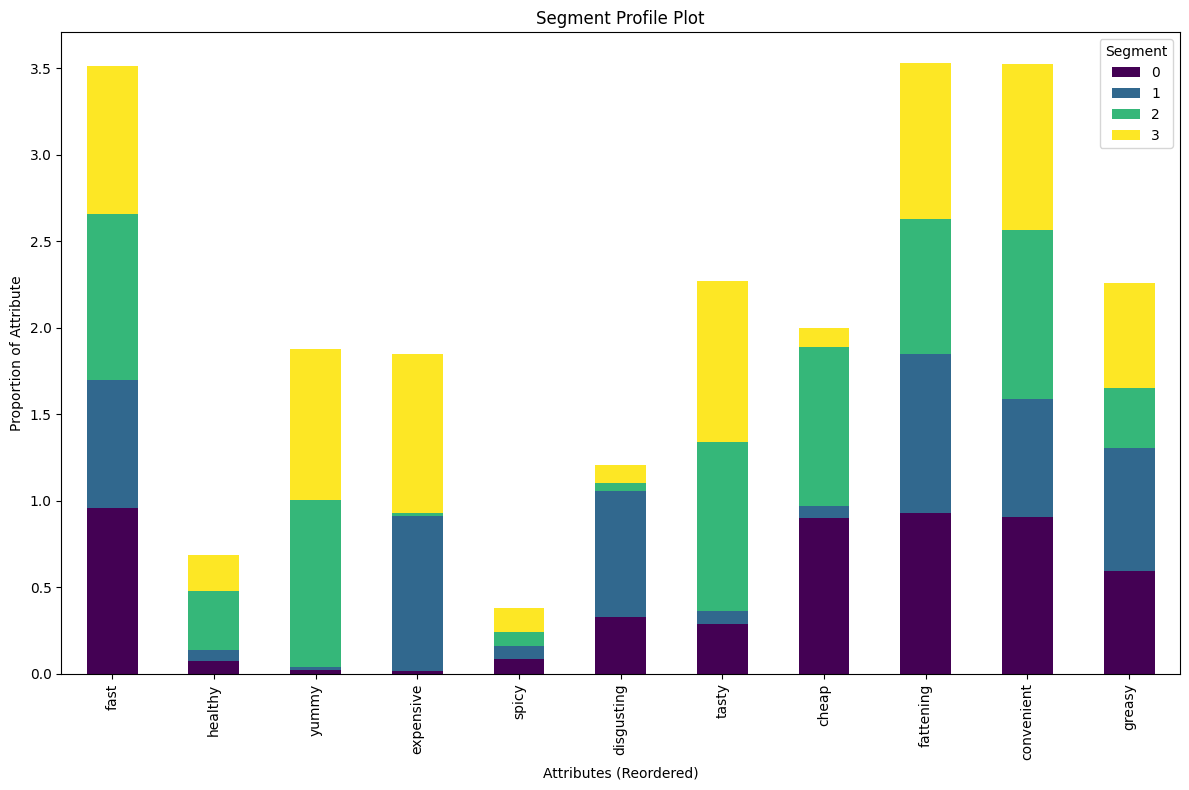

In [ ]:
# Import Necessary Libraries
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Assuming binary_features is already defined (your binary data)
# Perform Hierarchical Clustering on Attributes
attribute_distance = pdist(binary_features.T, metric='euclidean')
hierarchical_clustering = linkage(attribute_distance, method='ward')

# Reorder Attributes Based on Hierarchical Clustering
ordered_attributes = np.argsort(dendrogram(hierarchical_clustering, no_plot=True)['leaves'])

# Perform K-means Clustering with 4 Segments
kmeans_4_segments = KMeans(n_clusters=4, n_init=10, random_state=1234)
segment_labels = kmeans_4_segments.fit_predict(binary_features)

# Calculate Segment Profiles
segment_profiles = pd.DataFrame(binary_features).groupby(segment_labels).mean()

# Reorder Attributes in Segment Profiles
reordered_profiles = segment_profiles.iloc[:, ordered_attributes]

# Create Segment Profile Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create Bar Chart
reordered_profiles.T.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add Labels and Titles
plt.ylabel('Proportion of Attribute')
plt.xlabel('Attributes (Reordered)')
plt.title('Segment Profile Plot')
plt.xticks(
    ticks=np.arange(len(reordered_profiles.columns)),
    labels=[binary_features.columns[i] for i in ordered_attributes],
    rotation=90
)
plt.legend(title='Segment', loc='upper right')
plt.tight_layout()

# Show the Plot
plt.show()


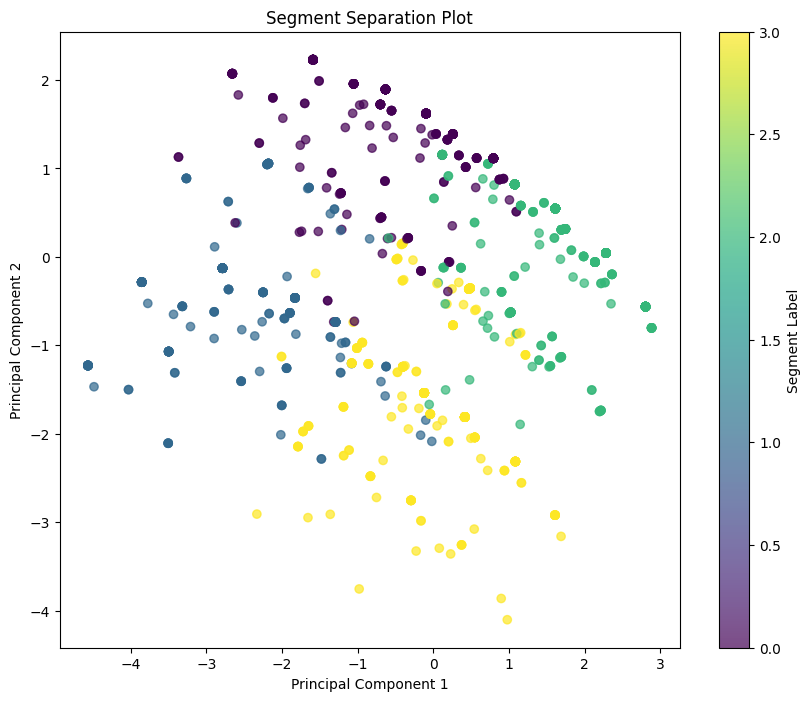

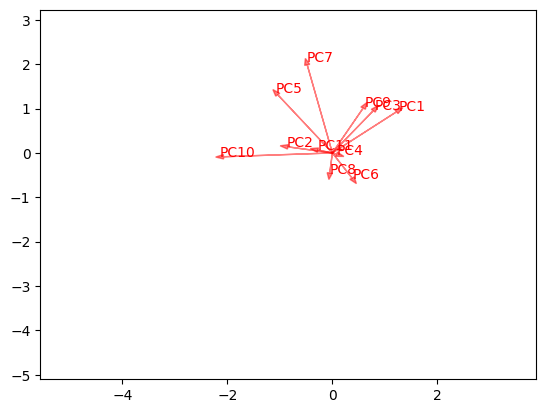

In [ ]:
# Plotting the Segment Separation Plot (without hulls and simlines)
plt.figure(figsize=(10, 8))

# Scatter plot of the first two principal components, color by cluster label
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=segment_labels, cmap='viridis', alpha=0.7)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add title
plt.title('Segment Separation Plot')

# Display the plot
plt.colorbar(label='Segment Label')
plt.show()

# Plot the principal component axes for reference (the same as projAxes in R)
for i in range(pca.components_.shape[0]):
    plt.arrow(0, 0, pca.components_[i, 0] * 3, pca.components_[i, 1] * 3,
              color='r', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[i, 0] * 3.1, pca.components_[i, 1] * 3.1, f'PC{i+1}', color='r')

plt.xlim([pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1])
plt.ylim([pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1])
plt.show()

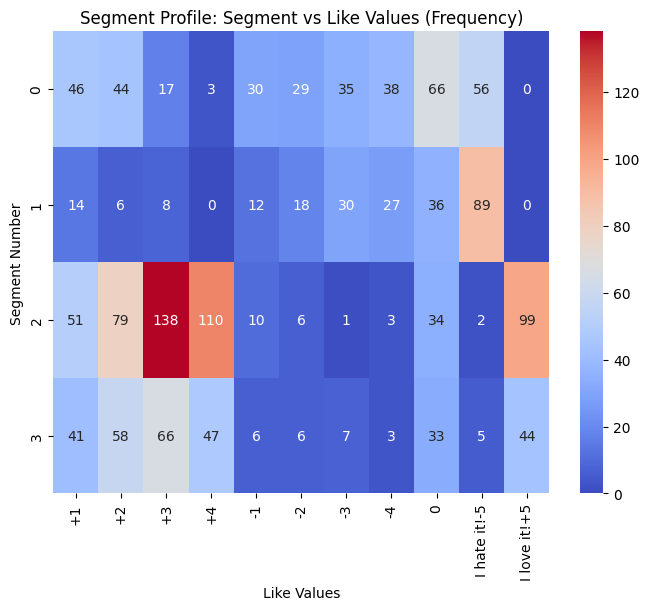

In [ ]:
# Cross-tabulate the segment labels and the 'Like' values directly
contingency_table = pd.crosstab(segment_labels, data['Like'])

# Plotting the heatmap for the frequencies of 'Like' values across segments
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the contingency table (frequencies)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)

# Adding labels and title
plt.xlabel('Like Values')
plt.ylabel('Segment Number')
plt.title('Segment Profile: Segment vs Like Values (Frequency)')

# Show plot
plt.show()

<Figure size 800x600 with 0 Axes>

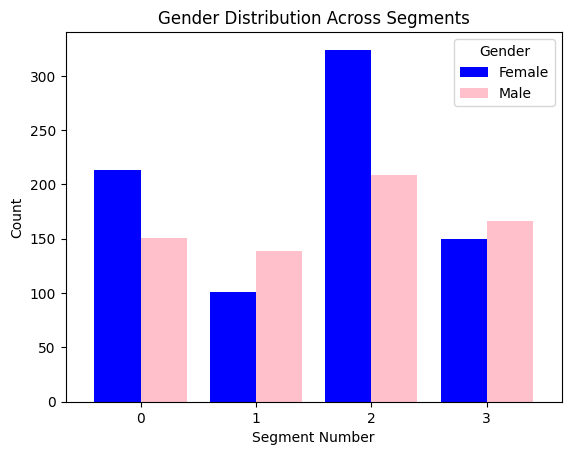

In [ ]:

# Add segment labels to the data
data['Segment'] = segment_labels

# Cross-tabulate the segment labels and the 'Gender' column
gender_distribution = pd.crosstab(data['Segment'], data['Gender'])

# Plotting the gender distribution across segments using a bar plot
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the gender distribution across segments
gender_distribution.plot(kind='bar', stacked=False, color=['blue', 'pink'], width=0.8)

# Adding labels and title
plt.xlabel('Segment Number')
plt.ylabel('Count')
plt.title('Gender Distribution Across Segments')

# Show plot
plt.xticks(rotation=0)
plt.show()

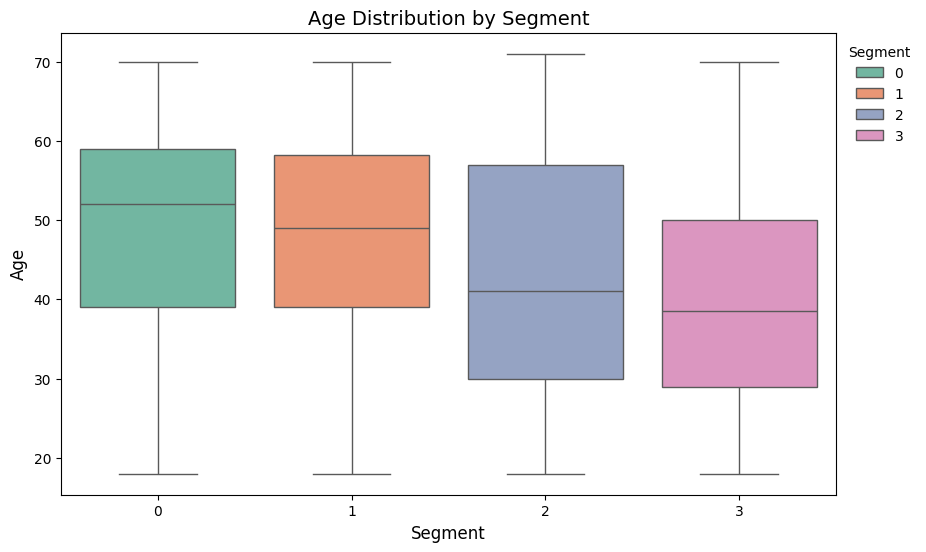

In [ ]:
# Create the Parallel Box-and-Whisker Plot of Age by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', data=data, hue='Segment', palette="Set2", showfliers=False)

# Add labels and title
plt.title("Age Distribution by Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Remove legend
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Show the plot
plt.show()

In [ ]:
# Convert ordinal Like to numeric Like.n
like_mapping = {'I hate it!-5': -5,'-4': -4,'-3': -3,'-2': -2,'-1': -1,'0': 0,'+1': 1,'+2': 2,'+3': 3,'+4': 4, 'I love it!+5': 5}
data['Like.n'] = data['Like'].map(like_mapping)

# Strip spaces and convert to lowercase to prevent mapping issues
data['VisitFrequency'] = data['VisitFrequency'].str.strip().str.lower()

# Define the mapping for VisitFrequency to numeric values based on frequency
visit_frequency_mapping = {
    'never': 0,
    'once a year': 1,
    'every three months': 2,
    'once a month': 3,
    'once a week': 4,
    'more than once a week': 5
}

# Apply the mapping to the 'VisitFrequency' column
data['VisitFrequency'] = data['VisitFrequency'].map(visit_frequency_mapping)

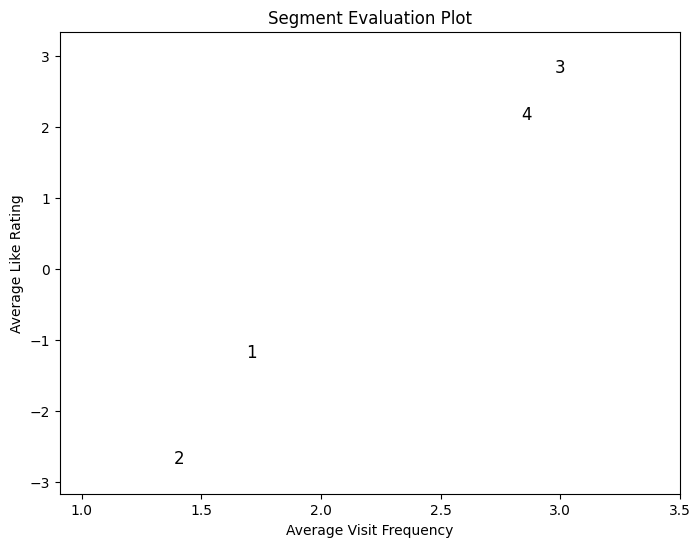

In [ ]:
# Compute the mean 'VisitFrequency', 'Like.n', and the proportion of females in each segment
visit = data.groupby('Segment')['VisitFrequency'].mean()
like = data.groupby('Segment')['Like.n'].mean()

# Convert 'Gender' to numeric and compute the proportion of females in each segment
female = data[data['Gender'] == 'Female'].groupby('Segment').size() / data.groupby('Segment').size()

# Create the segment evaluation plot
plt.figure(figsize=(8, 6))

# Bubble size is proportional to the proportion of females
plt.scatter(visit, like, s=10*female*100, color='b', alpha=0.6)

# Add text labels for each segment
for i in visit.index:
    plt.text(visit[i], like[i], str(i + 1), fontsize=12, ha='center', va='center')

# Dynamically set axis limits based on data
plt.xlim(min(visit) - 0.5, max(visit) + 0.5)
plt.ylim(min(like) - 0.5, max(like) + 0.5)

# Add axis labels
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like Rating')

# Show the plot
plt.title('Segment Evaluation Plot')
plt.show()